In [1]:
import pandas as pd
import numpy as np
from transformers import RobertaTokenizer, RobertaModel
import torch
import matplotlib.pyplot as plt


In [2]:
#Loading the training file
file_path = '/Users/diana/Desktop/isear-train.xlsx'
custom_headers = ['Emotions', 'Text']
df = pd.read_excel(file_path, skiprows=1, header=None, names=custom_headers)

In [3]:
label_encoding = {'anger': 0, 'disgust': 1, 'fear': 2, 'guilt': 3, 'joy': 4, 'sadness': 5, 'shame': 6}
y = df['Emotions'].values
y_train_encoded = np.array([label_encoding[label] for label in y])
print("Encoded labels:", y, y_train_encoded[:20])

Encoded labels: ['sadness' 'disgust' 'fear' ... 'sadness' 'disgust' 'fear'] [5 1 2 6 0 6 1 4 6 4 1 0 0 4 2 4 6 2 1 5]


In [4]:
#conda install torch transformers openpyxl
    


In [5]:
pip  install torch

Note: you may need to restart the kernel to use updated packages.


In [6]:
print (type(df['Text']))
strings = []
for index, sentence in enumerate(df['Text']):
    emotion_label = df['Emotions'][index]
    strings.append (sentence)
#print (strings[0:3])

<class 'pandas.core.series.Series'>


In [99]:
#Creating BERT embeddings for the TRAINSET
bert_model = RobertaModel.from_pretrained('roberta-base', output_hidden_states=True)
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#model = BertModel.from_pretrained('bert-base-uncased').to(device)

def get_sentence_embeddings(text_list, batch_size=32):
    all_embeddings = []

    # Process each sublist separately
    for i in range(0, len(text_list), batch_size):
        batch = text_list[i:i + batch_size]
        #print(f"Processing batch from index {i} to {i + len(batch)}")
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
        
        with torch.no_grad():
            outputs = bert_model(**inputs)

        # Extract the hidden state of the CLS token (first token)
        cls_embeddings = outputs.hidden_states[-1][:, 0, :]  # the last layer's CLS token state
        all_embeddings.append(cls_embeddings)  

    # Concatenate all batch embeddings
    sentence_embeddings = torch.cat(all_embeddings, dim=0)
    
    return sentence_embeddings

# Example usage with strings_dev
# sentence_embeddings_dev = get_sentence_embeddings(strings_dev)
# print("Sentence embeddings shape:", sentence_embeddings_dev.shape)

In [8]:
#sentence_embeddings = '/Users/diana/Desktop/TL/sentence_embeddings.pt'
#sentence_embeddings = torch.load(sentence_embeddings)
sentence_embeddings = get_sentence_embeddings(strings)



In [9]:
sentence_embeddings_roberta = '/Users/diana/Desktop/TL/ROBERTA_sentence_embeddings.pt'


In [10]:
print (sentence_embeddings.shape)

torch.Size([5366, 768])


In [28]:
#Devset BERT
file_path_dev = '/Users/diana/Desktop/isear-validation.xlsx'
custom_headers_dev = ['Emotions_dev', 'Text_dev']
df_dev = pd.read_excel(file_path_dev, skiprows=1, header=None, names=custom_headers_dev)

print (type(df_dev['Text_dev']))
strings_dev = []
for index, sentence in enumerate(df_dev['Text_dev']):
    emotion_label_dev = df_dev['Emotions_dev'][index]
    strings_dev.append (sentence)
print (strings_dev[0:3])


y_dev = df_dev['Emotions_dev'].values
y_dev_encoded = np.array([label_encoding[label] for label in y_dev])
y_dev_tensor = torch.tensor (y_dev_encoded)
#print (len (strings_dev))
#print (y_dev_tensor.shape)


<class 'pandas.core.series.Series'>
['[ Laziness makes one sad.]', 'I had to leave my girlfriend for 4 weeks because of my studies. This happens frequently. The last 24 hours before my departure are always very depressing.', 'I promised to join a meeting but did not turn up as I did not want to do the work.']


In [30]:
#Testset roberta
file_path_test = '/Users/diana/Desktop/isear-test.xlsx'
custom_headers_test = ['Emotions_test', 'Text_test']
df_test = pd.read_excel(file_path_test, skiprows=1, header=None, names=custom_headers_test)


strings_test = []
for index, sentence in enumerate(df_test['Text_test']):
    emotion_label_test = df_test['Emotions_test'][index]
    strings_test.append (sentence)
print (strings_test[0:3])


strings_test = df_test['Text_test'].tolist()
print (strings_test[0:3])
#print (strings_test)

y_test = df_test['Emotions_test'].values
y_test_encoded = np.array([label_encoding[label] for label in y_test])
y_test_encoded = torch.tensor (y_test_encoded)
print (len (df_test['Text_test']))



['My first feeling of falling in love.  Coming across a person who made me feel love, happiness, joy, giving me a new and beautiful future, who made me dream.', 'When I saw that the mark I had obtained in an exam was a good one.', 'When I learnt that I had been admitted to the university.']
['My first feeling of falling in love.  Coming across a person who made me feel love, happiness, joy, giving me a new and beautiful future, who made me dream.', 'When I saw that the mark I had obtained in an exam was a good one.', 'When I learnt that I had been admitted to the university.']
1150


In [13]:
#devset embeddings
sentence_embeddings_dev = get_sentence_embeddings(strings_dev)
# Print the shape of the embeddings
print("Sentence embeddings shape:", sentence_embeddings_dev.shape)

Sentence embeddings shape: torch.Size([1150, 768])


In [31]:
#testset
sentence_embeddings_test = get_sentence_embeddings(strings_test)
print("Sentence embeddings shape:", sentence_embeddings_test.shape)

Sentence embeddings shape: torch.Size([1150, 768])


In [ ]:
"""torch.save(sentence_embeddings, "sentence_embeddings.pt")
# To load the embeddings later
loaded_embeddings = torch.load("sentence_embeddings.pt")"""

In [32]:
print (type (sentence_embeddings))
y_train_tensor = torch.tensor(y_train_encoded)
y_test_tensor = torch.tensor(y_test_encoded)
print (y_dev_tensor.shape, y_test_tensor.shape,y_train_tensor.shape ) 

<class 'torch.Tensor'>
torch.Size([1150]) torch.Size([1150]) torch.Size([5366])


/var/folders/mh/2g8pjxqx2dldlw8dltkfmgvm0000gn/T/ipykernel_71845/1177048907.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_tensor = torch.tensor(y_test_encoded)


/var/folders/mh/2g8pjxqx2dldlw8dltkfmgvm0000gn/T/ipykernel_17949/3224357459.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = torch.tensor(sentence_embeddings, dtype=torch.float32).to(device)
/var/folders/mh/2g8pjxqx2dldlw8dltkfmgvm0000gn/T/ipykernel_17949/3224357459.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(y_train_tensor, dtype=torch.long).to(device)
/var/folders/mh/2g8pjxqx2dldlw8dltkfmgvm0000gn/T/ipykernel_17949/3224357459.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings_de

In [33]:
import torch
from nltk.tokenize import word_tokenize


# List of unique disgust words identified earlier
unique_disgust_words = ['prostitute', 'detested', 'disgusting', 'disgusted', 'disgust', 'vomit', 'rotten', 'stink', 'spider', 'contempt', 'drunk']

# Function to check if any of the disgust words are in the text
def disgust_words(text, disgust_words):
    tokens = word_tokenize(text.lower())
    """if any(word in tokens for word in disgust_words):
        print ("yes")"""
    return int(any(word in tokens for word in disgust_words))

# Apply the function to create the disgust feature
df['disgust_feature_train'] = df['Text'].apply(lambda x: disgust_words(x, unique_disgust_words))
df_test['disgust_feature_test'] = df_test['Text_test'].apply(lambda x: disgust_words(x, unique_disgust_words))
df_dev['disgust_feature_dev'] = df_dev['Text_dev'].apply(lambda x: disgust_words(x, unique_disgust_words))

# Extract the binary disgust feature as a numpy array and convert to tensor
disgust_features_train = torch.tensor(df['disgust_feature_train'].values, dtype=torch.float32).reshape(-1, 1)
disgust_features_test = torch.tensor(df_test['disgust_feature_test'].values, dtype=torch.float32).reshape(-1, 1)
disgust_features_dev = torch.tensor(df_dev['disgust_feature_dev'].values, dtype=torch.float32).reshape(-1, 1)

# Assuming embeddings are your BERT embeddings tensors
embeddings_train = torch.tensor(sentence_embeddings, dtype=torch.float32).to(device)
embeddings_test = torch.tensor(sentence_embeddings_test, dtype=torch.float32).to(device)
embeddings_dev = torch.tensor(sentence_embeddings_dev, dtype=torch.float32).to(device)

# Ensure the lengths match before concatenation
assert embeddings_train.shape[0] == disgust_features_train.shape[0], "Train set sizes do not match"
assert embeddings_test.shape[0] == disgust_features_test.shape[0], "Test set sizes do not match"
assert embeddings_dev.shape[0] == disgust_features_dev.shape[0], "Dev set sizes do not match"

# Concatenate the BERT embeddings with the disgust feature
augmented_embeddings_train = torch.cat((embeddings_train, disgust_features_train), dim=1)
embeddings_test = torch.tensor(sentence_embeddings_test, dtype=torch.float32).to(device)
embeddings_dev = torch.tensor(sentence_embeddings_dev, dtype=torch.float32).to(device)

# Ensure the lengths match before concatenation
assert embeddings_train.shape[0] == disgust_features_train.shape[0], "Train set sizes do not match"
assert embeddings_test.shape[0] == disgust_features_test.shape[0], "Test set sizes do not match"
assert embeddings_dev.shape[0] == disgust_features_dev.shape[0], "Dev set sizes do not match"

# Concatenate the BERT embeddings with the disgust feature
augmented_embeddings_train = torch.cat((embeddings_train, disgust_features_train), dim=1)
augmented_embeddings_test = torch.cat((embeddings_test, disgust_features_test), dim=1)
augmented_embeddings_dev = torch.cat((embeddings_dev, disgust_features_dev), dim=1)

print (augmented_embeddings_train.shape[1])

769


/var/folders/mh/2g8pjxqx2dldlw8dltkfmgvm0000gn/T/ipykernel_71845/1446272206.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings_train = torch.tensor(sentence_embeddings, dtype=torch.float32).to(device)
/var/folders/mh/2g8pjxqx2dldlw8dltkfmgvm0000gn/T/ipykernel_71845/1446272206.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings_test = torch.tensor(sentence_embeddings_test, dtype=torch.float32).to(device)
/var/folders/mh/2g8pjxqx2dldlw8dltkfmgvm0000gn/T/ipykernel_71845/1446272206.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(

In [34]:
# List of unique anger words identified earlier
unique_anger_words = ['anger', 'angry', 'rage', 'wrath', 'furious', 'enraged', 'irritated', 'kick', 'abuse']

# Function to check if any of the disgust words are in the text
def anger_words(text, anger_words):
    tokens = word_tokenize(text.lower())
    """if any(word in tokens for word in anger_words):
        print ("yes")"""
    return int(any(word in tokens for word in anger_words))

# Apply the function to create the disgust feature
df['anger_feature_train'] = df['Text'].apply(lambda x: anger_words(x, unique_anger_words))
df_test['anger_feature_test'] = df_test['Text_test'].apply(lambda x: anger_words(x, unique_anger_words))
df_dev['anger_feature_dev'] = df_dev['Text_dev'].apply(lambda x: anger_words(x, unique_anger_words))

# Extract the binary disgust feature as a numpy array and convert to tensor
anger_features_train = torch.tensor(df['anger_feature_train'].values, dtype=torch.float32).reshape(-1, 1)
anger_features_test = torch.tensor(df_test['anger_feature_test'].values, dtype=torch.float32).reshape(-1, 1)
anger_features_dev = torch.tensor(df_dev['anger_feature_dev'].values, dtype=torch.float32).reshape(-1, 1)


# Ensure the lengths match before concatenation
assert embeddings_train.shape[0] == anger_features_train.shape[0], "Train set sizes do not match"
assert embeddings_test.shape[0] == anger_features_test.shape[0], "Test set sizes do not match"
assert embeddings_dev.shape[0] == anger_features_dev.shape[0], "Dev set sizes do not match"

# Concatenate the BERT embeddings with the anger feature
augmented_embeddings_train_a = torch.cat((augmented_embeddings_train, anger_features_train), dim=1)
augmented_embeddings_test_a = torch.cat((augmented_embeddings_test, anger_features_test), dim=1)
augmented_embeddings_dev_a = torch.cat((augmented_embeddings_dev, anger_features_dev), dim=1)

print (augmented_embeddings_train_a.shape[1])

770


In [35]:
# List of unique anger words identified earlier
unique_shame_words = ['ashamed', 'embarrassed', 'humiliated', 'shame', 'regret', 'disgrace', 'dishonor', 'reject']

# Function to check if any of the disgust words are in the text
def shame_words(text, shame_words):
    tokens = word_tokenize(text.lower())
    """if any(word in tokens for word in shame_words):
        print ("yes")"""
    return int(any(word in tokens for word in shame_words))

# Apply the function to create the disgust feature
df['shame_feature_train'] = df['Text'].apply(lambda x: shame_words(x, unique_shame_words))
df_test['shame_feature_test'] = df_test['Text_test'].apply(lambda x: shame_words(x, unique_shame_words))
df_dev['shame_feature_dev'] = df_dev['Text_dev'].apply(lambda x: shame_words(x, unique_shame_words))

# Extract the binary disgust feature as a numpy array and convert to tensor
shame_features_train = torch.tensor(df['shame_feature_train'].values, dtype=torch.float32).reshape(-1, 1)
shame_features_test = torch.tensor(df_test['shame_feature_test'].values, dtype=torch.float32).reshape(-1, 1)
shame_features_dev = torch.tensor(df_dev['shame_feature_dev'].values, dtype=torch.float32).reshape(-1, 1)


# Ensure the lengths match before concatenation
assert embeddings_train.shape[0] == shame_features_train.shape[0], "Train set sizes do not match"
assert embeddings_test.shape[0] == shame_features_test.shape[0], "Test set sizes do not match"
assert embeddings_dev.shape[0] == shame_features_dev.shape[0], "Dev set sizes do not match"

# Concatenate the BERT embeddings with the anger feature
augmented_embeddings_train_shame = torch.cat((augmented_embeddings_train_a, shame_features_train), dim=1)
augmented_embeddings_test_shame= torch.cat((augmented_embeddings_test_a, shame_features_test), dim=1)
augmented_embeddings_dev_shame = torch.cat((augmented_embeddings_dev_a, shame_features_dev), dim=1)

print (augmented_embeddings_train_shame.shape[1])

771


In [37]:
# List of unique fear words identified earlier
unique_fear_words = ['afraid', 'fear', 'panic', 'scare', 'worry', 'anxious', 'frighten', 'dark']

# Function to check if any of the disgust words are in the text
def fear_words(text, fear_words):
    tokens = word_tokenize(text.lower())
    """if any(word in tokens for word in shame_words):
        print ("yes")"""
    return int(any(word in tokens for word in fear_words))

# Apply the function to create the disgust feature
df['fear_feature_train'] = df['Text'].apply(lambda x: fear_words(x, unique_fear_words))
df_test['fear_feature_test'] = df_test['Text_test'].apply(lambda x: fear_words(x, unique_fear_words))
df_dev['fear_feature_dev'] = df_dev['Text_dev'].apply(lambda x: fear_words(x, unique_fear_words))

# Extract the binary disgust feature as a numpy array and convert to tensor
fear_features_train = torch.tensor(df['fear_feature_train'].values, dtype=torch.float32).reshape(-1, 1)
fear_features_test = torch.tensor(df_test['fear_feature_test'].values, dtype=torch.float32).reshape(-1, 1)
fear_features_dev = torch.tensor(df_dev['fear_feature_dev'].values, dtype=torch.float32).reshape(-1, 1)


# Ensure the lengths match before concatenation
assert embeddings_train.shape[0] == fear_features_train.shape[0], "Train set sizes do not match"
assert embeddings_test.shape[0] == fear_features_test.shape[0], "Test set sizes do not match"
assert embeddings_dev.shape[0] == fear_features_dev.shape[0], "Dev set sizes do not match"

# Concatenate the BERT embeddings with the anger feature
augmented_embeddings_train_fear = torch.cat((augmented_embeddings_train_shame, fear_features_train), dim=1)
augmented_embeddings_test_fear= torch.cat((augmented_embeddings_test_shame, fear_features_test), dim=1)
augmented_embeddings_dev_fear = torch.cat((augmented_embeddings_dev_shame, fear_features_dev), dim=1)

print (augmented_embeddings_train_fear.shape[1])
print (augmented_embeddings_test_fear.shape[1])
print (augmented_embeddings_dev_fear.shape[1])

772
772
772


In [38]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.init as init


# Convert to PyTorch tensors
embeddings = torch.tensor(augmented_embeddings_train_fear, dtype=torch.float32).to(device)
labels = torch.tensor(y_train_tensor, dtype=torch.long).to(device)

embeddings_dev = torch.tensor(augmented_embeddings_dev_fear, dtype=torch.float32)
labels_dev = torch.tensor(y_dev_encoded, dtype=torch.long)

embeddings_test = torch.tensor(augmented_embeddings_test_fear, dtype=torch.float32)
labels_test = torch.tensor(y_test_tensor, dtype=torch.long)

# Create a dataset and dataloader
dataset = TensorDataset(embeddings, labels)
dataset_dev = TensorDataset(embeddings_dev,labels_dev)
dataset_test = TensorDataset(embeddings_test,labels_test)


train_loader = DataLoader(dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset_dev, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset_test, batch_size=32, shuffle=False)

import torch.nn.init as init


class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.bn1 = nn.BatchNorm1d(hidden_dim1)
        self.relu1 = nn.LeakyReLU()
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)
        self.relu2 = nn.LeakyReLU()
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.bn3 = nn.BatchNorm1d(hidden_dim3)
        self.relu3 = nn.LeakyReLU()
        self.dropout3 = nn.Dropout(0.3)  # Adjusted dropout rate

        self.fc4 = nn.Linear(hidden_dim3, output_dim)


        self.init_weights()

    def init_weights(self):
        init.kaiming_uniform_(self.fc1.weight, nonlinearity='leaky_relu')
        init.constant_(self.fc1.bias, 0)
        init.kaiming_uniform_(self.fc2.weight, nonlinearity='leaky_relu')
        init.constant_(self.fc2.bias, 0)
        init.kaiming_uniform_(self.fc3.weight, nonlinearity='leaky_relu')
        init.constant_(self.fc3.bias, 0)
        init.kaiming_uniform_(self.fc4.weight, nonlinearity='leaky_relu')
        init.constant_(self.fc4.bias, 0)

    
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.dropout3(x)

        x = self.fc4(x)
        return x

input_dim = sentence_embeddings.shape[1] + 3 + 1 # 768 + 2
hidden_dim1 = 568  
hidden_dim2 = 16   
hidden_dim3 = 568   
output_dim = 7

/var/folders/mh/2g8pjxqx2dldlw8dltkfmgvm0000gn/T/ipykernel_71845/3827846616.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embeddings = torch.tensor(augmented_embeddings_train_fear, dtype=torch.float32).to(device)
/var/folders/mh/2g8pjxqx2dldlw8dltkfmgvm0000gn/T/ipykernel_71845/3827846616.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(y_train_tensor, dtype=torch.long).to(device)
/var/folders/mh/2g8pjxqx2dldlw8dltkfmgvm0000gn/T/ipykernel_71845/3827846616.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  e

In [81]:
simp_model = SimpleNN(input_dim, hidden_dim1, output_dim).to(device)
lossf = nn.CrossEntropyLoss()
optimizer = optim.AdamW (simp_model.parameters(), lr=0.001, weight_decay=1e-10) # L2 regularization #0.0008
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)


In [94]:
num_epochs = 24

# Initialize lists to store losses
train_losses = []
val_losses = []
test_losses = []

for epoch in range(num_epochs):
    # Training phase
    simp_model.train()
    train_loss = 0.0
    
    for batch_embeddings, batch_labels in train_loader:
        # Forward pass
        outputs = simp_model(batch_embeddings)
        loss = lossf(outputs, batch_labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    # Calculate average training loss
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    # Validation phase
    simp_model.eval()
    val_loss = 0.0

    
    with torch.no_grad():
        for batch_embeddings, batch_labels in val_loader:
            outputs = simp_model(batch_embeddings)
            loss = lossf(outputs, batch_labels)
            val_loss += loss.item()
    
    # Calculate average validation loss
    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    scheduler.step(val_loss)
    
    # Test phase
    simp_model.eval()
    test_loss = 0.0
    
    with torch.no_grad():
        for batch_embeddings, batch_labels in test_loader:
            outputs = simp_model(batch_embeddings)
            loss = lossf(outputs, batch_labels)
            test_loss += loss.item()
    
    # Calculate average test loss
    test_loss /= len(test_loader)
    test_losses.append(test_loss)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Test Loss: {test_loss:.4f}')


Epoch [1/24], Train Loss: 0.4964, Val Loss: 1.0492, Test Loss: 1.0507
Epoch [2/24], Train Loss: 0.4971, Val Loss: 1.0525, Test Loss: 1.0537
Epoch [3/24], Train Loss: 0.4976, Val Loss: 1.0536, Test Loss: 1.0538
Epoch [4/24], Train Loss: 0.4989, Val Loss: 1.0613, Test Loss: 1.0642
Epoch [5/24], Train Loss: 0.4831, Val Loss: 1.0405, Test Loss: 1.0463
Epoch [6/24], Train Loss: 0.4995, Val Loss: 1.0833, Test Loss: 1.0804
Epoch [7/24], Train Loss: 0.4820, Val Loss: 1.0503, Test Loss: 1.0565
Epoch [8/24], Train Loss: 0.5009, Val Loss: 1.0564, Test Loss: 1.0694
Epoch [9/24], Train Loss: 0.4879, Val Loss: 1.0374, Test Loss: 1.0482
Epoch [10/24], Train Loss: 0.4876, Val Loss: 1.0501, Test Loss: 1.0581
Epoch [11/24], Train Loss: 0.4919, Val Loss: 1.0446, Test Loss: 1.0562
Epoch [12/24], Train Loss: 0.4874, Val Loss: 1.0398, Test Loss: 1.0475
Epoch [13/24], Train Loss: 0.4851, Val Loss: 1.0385, Test Loss: 1.0484
Epoch [14/24], Train Loss: 0.4851, Val Loss: 1.0431, Test Loss: 1.0477
Epoch [15/24], 

In [95]:
from sklearn.metrics import f1_score

simp_model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for batch_embeddings, batch_labels in test_loader:
        outputs = simp_model(batch_embeddings)
        _, predicted = torch.max(outputs.data, 1)
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()
    f1 = f1_score(predicted , batch_labels, average='weighted')
    f1_macro = f1_score(predicted, batch_labels, average='macro')
    print (f1, f1_macro)
    print(f'Accuracy of the model on the data: {100 * correct / total:.2f}%')

0.7052146110969642 0.6854620636133243
Accuracy of the model on the data: 64.35%


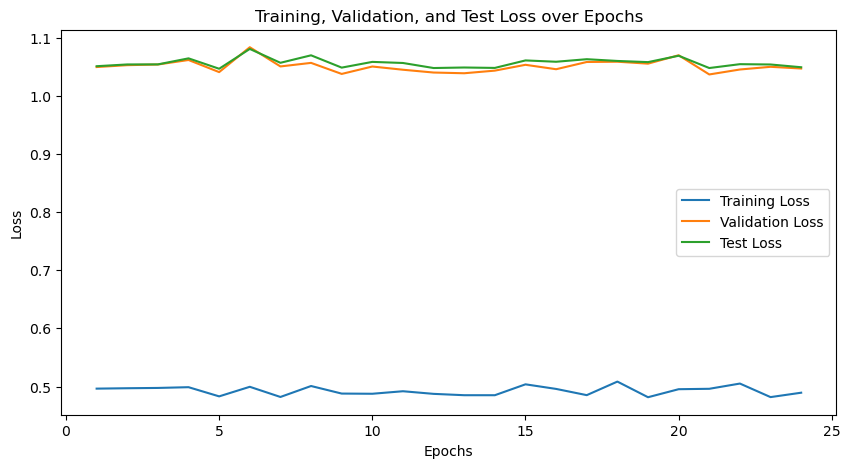

In [96]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss over Epochs')
plt.legend()
plt.show()


In [97]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [98]:
class_correct = np.zeros(output_dim)
class_total = np.zeros(output_dim)

# Collect true and predicted labels for calculating F1 score
true_labels = []
pred_labels = []

# Calculate correct and total predictions for each class
for true_label, pred_label in zip(batch_labels, predicted):
    true_labels.append(true_label)
    pred_labels.append(pred_label)
    if true_label == pred_label:
        class_correct[true_label] += 1
    class_total[true_label] += 1

# Calculate accuracy for each class
class_accuracies = class_correct / class_total

# Calculate F1 score for each class
f1_scores = f1_score(true_labels, pred_labels, average=None)

# Print accuracy and F1 score for each class
for label, (accuracy, f1) in enumerate(zip(class_accuracies, f1_scores)):
    print(f"Accuracy for class {label}: {accuracy:.4f}, F1 score: {f1:.4f}")

Accuracy for class 0: 0.4000, F1 score: 0.5714
Accuracy for class 1: 1.0000, F1 score: 0.6667
Accuracy for class 2: 0.6667, F1 score: 0.5714
Accuracy for class 3: 0.6667, F1 score: 0.7059
Accuracy for class 4: 1.0000, F1 score: 0.8889
Accuracy for class 5: 0.6667, F1 score: 0.7273
Accuracy for class 6: 1.0000, F1 score: 0.6667
